In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.io as sio
from _symbolic_clustering import SymbolicClustering
from _dynamic_clustering import DynamicClustering
import copy
from _parameters_self_tuning import ParametersSelfTuning
from _slade_mts import SladeMts


In [2]:
def getDataSet():
    curr_path = os.getcwd()
    data_path = os.path.join(curr_path, "dataset")
    data_path = os.path.join(data_path, "airquality")
    file_path = os.path.join(data_path, "AirQualityUCIv2.csv")
    print(file_path)
    dfc = pd.read_csv(file_path)
    print(dfc)

    dataDict = {}
    for column in dfc.columns:
        if column != 'Date' and column != 'DateTime':
            dataDict[column] = [[]]
    #print(dataDict)
    for index, row in dfc.iterrows():
        dateTime = pd.to_datetime(row['DateTime'])
        # print(dateTime.strftime('%a'))
        # print(dateTime.strftime('%H'))
        if dateTime.strftime('%a') == 'Mon' and dateTime.strftime('%H') == '00':
            for key in dataDict.keys():
                dataDict[key].append([])

        for key in dataDict.keys():
                dataDict[key][-1].append(row[key])

    
    dataSet = []
    listBounds = []
    for key in dataDict.keys():
        data = dataDict[key]
        data.pop()
        data.pop(0)
        # print('----------------------------------')
        # print(data)
        # print('----------------------------------')
        _max = max(map(max, data))
        _min = min(map(min, data))
        upperBound = _max + (_max - _min) * 0.1
        lowerBound = _min - (_max - _min) * 0.1
        listBounds.append((lowerBound, upperBound))
        dataSet.append(data)

    #plot original data
    #print(dataDict)
    return dataSet, dataDict, listBounds



def plotDataset(dataDict, anomalyLocations = None):
    fig = plt.figure()
    cnt = 1
    for key in dataDict.keys():
        ax = fig.add_subplot(3, 4, cnt)
        ax.set_title(key)
        ax.set_xlabel('Time')
        ax.set_ylabel('Content')
        data = dataDict[key]
        for series in data:
            ax.plot(series)
        cnt += 1
    plt.show()


dataSet, dataDict, listBounds = getDataSet()


g:\聚义岩\Block+MachineLearning\Algorithm\SLADE\dataset\airquality\AirQualityUCIv2.csv
                     Date  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
0     2004-03-10 00:00:00     2.6       1360.0      11.9         1046.0   
1     2004-03-10 00:00:00     2.0       1292.0       9.4          955.0   
2     2004-03-10 00:00:00     2.2       1402.0       9.0          939.0   
3     2004-03-10 00:00:00     2.2       1376.0       9.2          948.0   
4     2004-03-10 00:00:00     1.6       1272.0       6.5          836.0   
...                   ...     ...          ...       ...            ...   
9352  2005-04-04 00:00:00     3.1       1314.0      13.5         1101.0   
9353  2005-04-04 00:00:00     2.4       1163.0      11.4         1027.0   
9354  2005-04-04 00:00:00     2.4       1142.0      12.4         1063.0   
9355  2005-04-04 00:00:00     2.1       1003.0       9.5          961.0   
9356  2005-04-04 00:00:00     2.2       1071.0      11.9         1047.0   

      NOx(GT)  

In [3]:
# set parameters
segmentLength = 12 
paaSize = 3 # every single time
alphabetSize = 6
pStep = 8
seriesLen = 24 * 7
sladeMts = SladeMts(dataSet = dataSet, listBounds = listBounds, segmentLength = segmentLength, alphabetSize = alphabetSize, paaSize = paaSize, pStep = pStep, seriesLen = seriesLen)
listPatterns = sladeMts.patternGenerate()
listNewTimeSeries, patternLocations = sladeMts.dataTransformation(dataSet, listPatterns)

正在生成patterns...
0.0
0.08333333333333333
0.16666666666666666
0.25
0.3333333333333333
0.4166666666666667
0.5
0.5833333333333334
0.6666666666666666
0.75
0.8333333333333334
0.9166666666666666
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


(55, 30)
           0         1            2            3            4           5  \
0   1.210134  0.493667   958.170131  1623.188837   391.369391  139.269523   
1   1.131170  0.526796   224.285532     0.000000  1558.405275  244.145448   
2   0.733433  0.990135   838.683492   850.206446  1562.024968  290.757631   
3   1.263380  0.381270     0.000000   407.078616   741.765462  298.207981   
4   1.047626  0.598423   737.421182  1176.853007  2413.855422  347.194110   
5   1.744464  0.229769   692.613890   756.027777   592.223775  326.889380   
6   1.210773  0.430072   889.432965  1304.505653  1642.963177  188.425051   
7   2.748420  1.144402   679.142842   842.790009   454.170673  339.655708   
8   1.836852  0.328657   791.233847   758.534772   645.091466  262.097310   
9   1.397317  0.255113   423.376901   622.283697  1146.709205  186.335719   
10  0.098481  1.636630   641.383661   650.661971  1827.711958  242.902979   
11  3.668430  2.045622   547.178216   581.502365   844.664430  431.

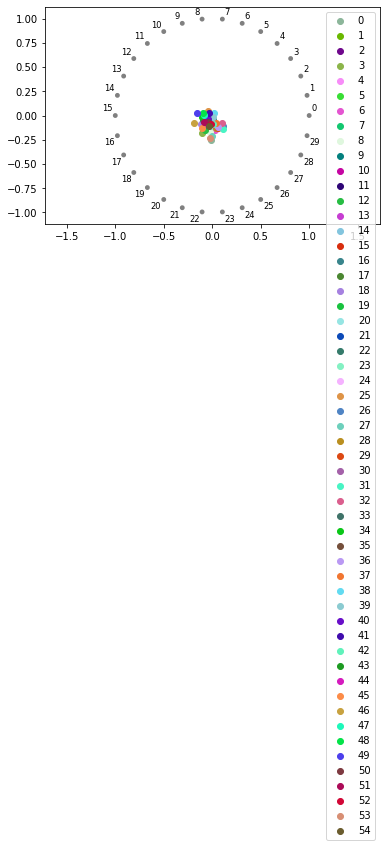

In [4]:
featureNum = 30
selectedFeature, idx = SladeMts.featureSelection(listNewTimeSeries, featureNum)

# -------------- plot ----------------#
shape = selectedFeature.shape
print(shape)
columnNames = []
for i in range(0, shape[1]):
    columnNames.append(str(i))
df = pd.DataFrame(selectedFeature, columns = columnNames)
df[str(shape[1])] = '1'
for i in range(0, shape[0]):
    df[str(shape[1])][i] = str(i)
print(df)
pd.plotting.radviz(df, str(shape[1]))
plt.show()

In [7]:
from sklearn.cluster import DBSCAN
res = []
# 迭代不同的eps值
for min_samples in range(2,10):
    # 迭代不同的min_samples值
    for eps in np.arange(1000,2000,50):
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        # 模型拟合
        dbscan.fit(selectedFeature)
        # 统计各参数组合下的聚类个数（-1表示异常点）
        n_clusters = len([i for i in set(dbscan.labels_) if i != -1])
        # 异常点的个数
        outliners = np.sum(np.where(dbscan.labels_ == -1, 1,0))
        # 统计每个簇的样本个数
        stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
        res.append({'eps':eps,'min_samples':min_samples,'n_clusters':n_clusters,'outliners':outliners,'stats':stats})
# 将迭代后的结果存储到数据框中
pd.set_option('display.max_rows', None)        
df = pd.DataFrame(res)
print(df)

<ipython-input-7-c22fc9a13875>:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
<ipython-input-7-c22fc9a13875>:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
<ipython-input-7-c22fc9a13875>:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
<ipython-input-7-c22fc9a13875>:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a fut

In [5]:
from _slade_mts import SladeMts
eps = 1800
min_samples = 4
sensibility = 1.9
anomalyIndex,anomalyLocations = SladeMts.anomalyDetection_DBScan(selected_features = selectedFeature, features_idx = idx, patternLocations = patternLocations, eps = eps, min_samples = min_samples, sensibility = sensibility)
print(anomalyIndex)
print(anomalyLocations)

[41]
[[(7, 60, 72), (8, 156, 168), (4, 132, 168), (3, 48, 72), (7, 48, 60), (4, 120, 132)]]


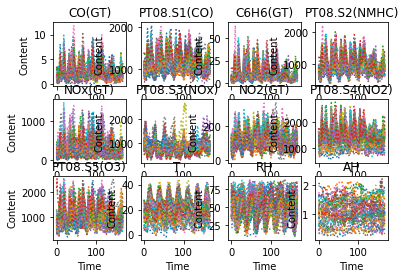

In [11]:
fig = plt.figure()
cnt = 1
for key in dataDict.keys():
    ax = fig.add_subplot(3, 4, cnt)
    ax.set_title(key)
    ax.set_xlabel('Time')
    ax.set_ylabel('Content')
    data = dataDict[key]
    for i in range(0, len(data)):
        ax.plot(data[i])
        if i in anomalyIndex:
            
    cnt += 1
plt.show()

In [6]:
# anomalyIndex = [0, 39, 50]
# anomalyLocations = [[(0, 64, 68), (0, 48, 52), (6, 152, 160), (11, 84, 88), (0, 8, 12), (0, 80, 84)], [(6, 152, 160), (10, 80, 84)], [(0, 64, 68), (0, 8, 12), (5, 100, 108), (0, 80, 84)]]

anomalyDict = {}

for i in range(0, len(anomalyIndex)):
    for location in anomalyLocations[i]:
        dim = location[0]
        if anomalyDict.get(location[0]) == None:
            anomalyDict[dim] = []
        anomalyDict[dim].append((anomalyIndex[i], location[1], location[2]))
print(anomalyDict) 



{7: [(41, 60, 72), (41, 48, 60)], 8: [(41, 156, 168)], 4: [(41, 132, 168), (41, 120, 132)], 3: [(41, 48, 72)]}


!!!
!!!
!!!
!!!
!!!
!!!


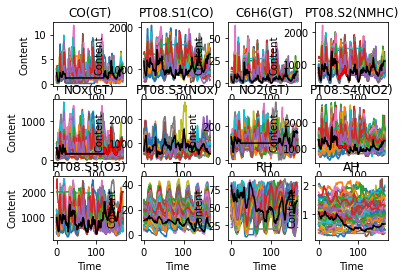

In [7]:
fig = plt.figure()
cnt = 1
mainSeries = 41
for key in dataDict.keys():
    ax = fig.add_subplot(3, 4, cnt)
    ax.set_title(key)
    ax.set_xlabel('Time')
    ax.set_ylabel('Content')
    data = dataDict[key]
    for series in data:
        ax.plot(series)
    ax.plot(data[mainSeries], color = 'black')

    if anomalyDict.get((cnt-1)) != None:
        locations = anomalyDict[cnt-1]
        for location in locations:
            if location[0] == mainSeries:
                print('!!!')
                ax.plot(data[mainSeries][0:location[2]], color = 'red')
                ax.plot(data[mainSeries][0:location[1]], color = 'black')
    cnt += 1
plt.show()